<a href="https://colab.research.google.com/github/JaimeJaner/Proyecto-para-la-predicci-n-de-C-ncer-Cervical/blob/main/Modelo_Predictivo_de_Cancer_Cervical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Presentación del proyecto

#Cáncer cervical - Cuello uterino.
"El cáncer de cuello uterino es una de las principales causas de muertes relacionadas con el cáncer entre las mujeres en todo el mundo. La detección temprana y la predicción precisa del cáncer de cuello uterino pueden mejorar significativamente las posibilidades de un tratamiento exitoso y salvar vidas. Este proyecto tiene como objetivo desarrollar un modelo predictivo utilizando técnicas de aprendizaje automático para identificar personas con alto riesgo de cáncer de cuello uterino, permitiendo una intervención y atención médica oportuna.

El principal objetivo de este proyecto es construir un modelo robusto de aprendizaje automático que pueda predecir la probabilidad de cáncer de cuello uterino en función de características relevantes y datos de pacientes. Al analizar un conjunto de datos de casos de cáncer de cuello uterino, el modelo aprenderá patrones y correlaciones para hacer predicciones precisas, lo que permitirá a los profesionales de la salud identificar a pacientes de alto riesgo."

#Inicio del proyecto - Importación de librerías


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Importación de los datos del proyecto.

In [19]:
#Nota: Descargar el documento anexo en el repositorio para poder acceder a él.

from google.colab import files

# Sube el archivo CSV desde tu computadora
uploaded = files.upload()

# Lee el archivo CSV en un DataFrame de pandas
for filename in uploaded.keys():
    df = pd.read_csv(filename)

print("Dataset cargado con éxito.")

Saving cervical-cancer_csv.csv to cervical-cancer_csv (3).csv
Dataset cargado con éxito.


#Exploración y análisis de los datos

In [20]:
# Muestra las primeras filas del DataFrame
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [21]:
#Tamaño del Dataframe
shape= df.shape
print(f"Filas: {shape[0]}, Columnas: {shape[1]}")

Filas: 835, Columnas: 36


In [22]:
#Tipos de datos y demás información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

In [23]:
#Vertificación de valores nulos dentro de las columnas del dataframe.
df.isna().any()

Age                                   False
Number of sexual partners              True
First sexual intercourse               True
Num of pregnancies                     True
Smokes                                 True
Smokes (years)                         True
Smokes (packs/year)                    True
Hormonal Contraceptives                True
Hormonal Contraceptives (years)        True
IUD                                    True
IUD (years)                            True
STDs                                   True
STDs (number)                          True
STDs:condylomatosis                    True
STDs:cervical condylomatosis           True
STDs:vaginal condylomatosis            True
STDs:vulvo-perineal condylomatosis     True
STDs:syphilis                          True
STDs:pelvic inflammatory disease       True
STDs:genital herpes                    True
STDs:molluscum contagiosum             True
STDs:AIDS                              True
STDs:HIV                        

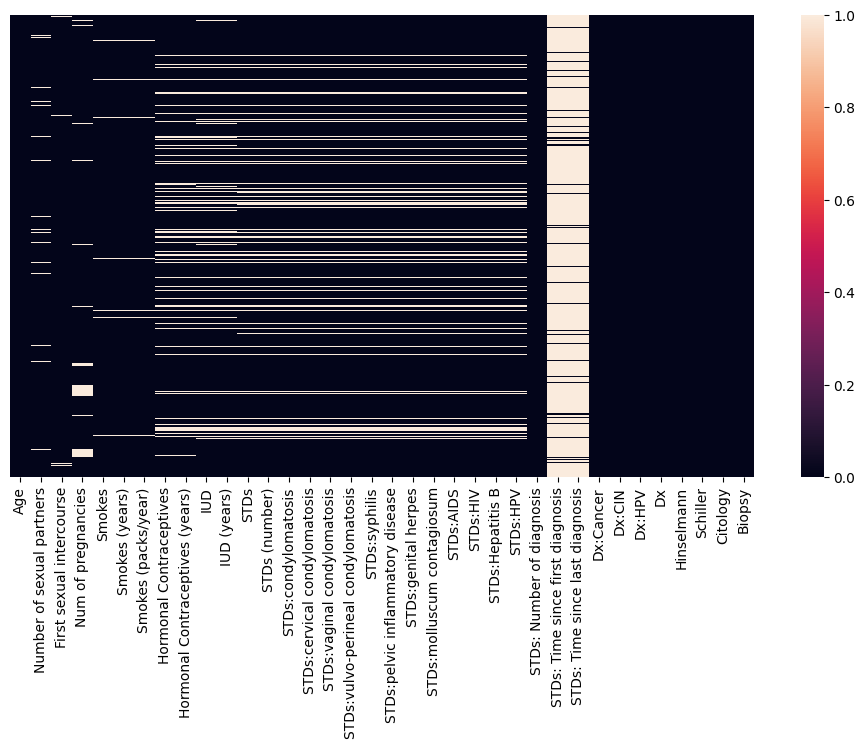

In [24]:
#Visualización en mapa de calor de los valores nulos dentro del dataframe.
plt.figure(figsize = (12, 6))
sns.heatmap(df.isna(), yticklabels = False)
plt.show()

In [25]:
#Reemplazamos los valores erróneos por valores nulos para su posterior tratamiento.
df = df.replace('?', np.nan)

In [27]:
#Descripción estadística del dataframe.
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,810.000000,828.000000,779.000000,822.000000,822.000000,822.000000,732.000000,732.000000,723.000000,...,71.000000,71.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.551852,17.020531,2.304236,0.149635,1.253850,0.465823,0.651639,2.302916,0.114799,...,6.140845,5.816901,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.676686,2.817000,1.455817,0.356930,4.140727,2.256273,0.476777,3.794180,0.319000,...,5.895024,5.755271,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#Filtramos por el promedio de los valores de cada columna para el tratamiento de los valores nulos.
df.mean()

Age                                   27.023952
Number of sexual partners              2.551852
First sexual intercourse              17.020531
Num of pregnancies                     2.304236
Smokes                                 0.149635
Smokes (years)                         1.253850
Smokes (packs/year)                    0.465823
Hormonal Contraceptives                0.651639
Hormonal Contraceptives (years)        2.302916
IUD                                    0.114799
IUD (years)                            0.527621
STDs                                   0.107483
STDs (number)                          0.180952
STDs:condylomatosis                    0.059864
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005442
STDs:vulvo-perineal condylomatosis     0.058503
STDs:syphilis                          0.024490
STDs:pelvic inflammatory disease       0.001361
STDs:genital herpes                    0.001361
STDs:molluscum contagiosum             0

In [30]:
#Rellenamos los valores nulos con valores promedio de nuestro datafrae.
df  = df.fillna(df.mean())
#Verificamos nuevamente que no existan valores nulos en el conjunto de datos.
df.isna().any()

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

# Observación de la correlación de los datos.

In [32]:
#Creación y visualización de la matriz de correlación.
mc = df.corr()
mc

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.070393,0.360942,0.516255,0.046625,0.213631,0.128271,0.039047,0.267937,0.264234,...,1.054546e-01,1.260276e-01,0.108519,0.059899,0.099765,0.089979,-0.009050,0.101150,-0.019194,0.054396
Number of sexual partners,0.070393,1.000000,-0.155194,0.066302,0.234549,0.174446,0.173685,-0.009221,0.010643,0.025579,...,1.856838e-02,2.770227e-02,0.020319,0.014289,0.025316,0.020654,-0.042595,-0.017298,0.014021,-0.009584
First sexual intercourse,0.360942,-0.155194,1.000000,-0.070213,-0.128780,-0.061682,-0.058716,0.003008,0.001125,-0.024437,...,1.837618e-02,2.575127e-02,0.066566,-0.033861,0.043034,0.034535,-0.018585,0.003783,-0.009438,0.008496
Num of pregnancies,0.516255,0.066302,-0.070213,1.000000,0.073625,0.170801,0.094033,0.125954,0.199409,0.194578,...,5.978954e-02,7.606569e-02,0.032414,0.006463,0.044150,0.016422,0.035146,0.087259,-0.029993,0.044011
Smokes,0.046625,0.234549,-0.128780,0.073625,1.000000,0.722303,0.492470,-0.010657,0.039673,-0.054692,...,2.301158e-02,3.089466e-02,-0.012670,-0.044132,0.010629,-0.069700,0.032292,0.052422,-0.004358,0.028471
Smokes (years),0.213631,0.174446,-0.061682,0.170801,0.722303,1.000000,0.723737,-0.017558,0.045585,0.025168,...,5.235844e-02,5.967581e-02,0.053593,-0.031877,0.056138,-0.050345,0.069674,0.094223,-0.007120,0.061448
Smokes (packs/year),0.128271,0.173685,-0.058716,0.094033,0.492470,0.723737,1.000000,0.001623,0.037833,0.006215,...,3.792510e-02,4.156486e-02,0.107777,-0.021734,0.109668,-0.034325,0.025542,0.017251,0.004477,0.024430
Hormonal Contraceptives,0.039047,-0.009221,0.003008,0.125954,-0.010657,-0.017558,0.001623,1.000000,0.444087,0.026560,...,2.300711e-02,4.026495e-02,0.023485,-0.005541,0.035531,-0.005400,0.029373,-0.005414,-0.008712,0.008858
Hormonal Contraceptives (years),0.267937,0.010643,0.001125,0.199409,0.039673,0.045585,0.037833,0.444087,1.000000,0.091109,...,7.063788e-02,8.056677e-02,0.052932,0.001884,0.059837,-0.014990,0.036274,0.078274,0.076046,0.079738
IUD,0.264234,0.025579,-0.024437,0.194578,-0.054692,0.025168,0.006215,0.026560,0.091109,1.000000,...,5.821105e-02,6.801383e-02,0.109352,0.051267,0.056945,0.137831,0.042244,0.083607,0.007454,0.051631


<Axes: >

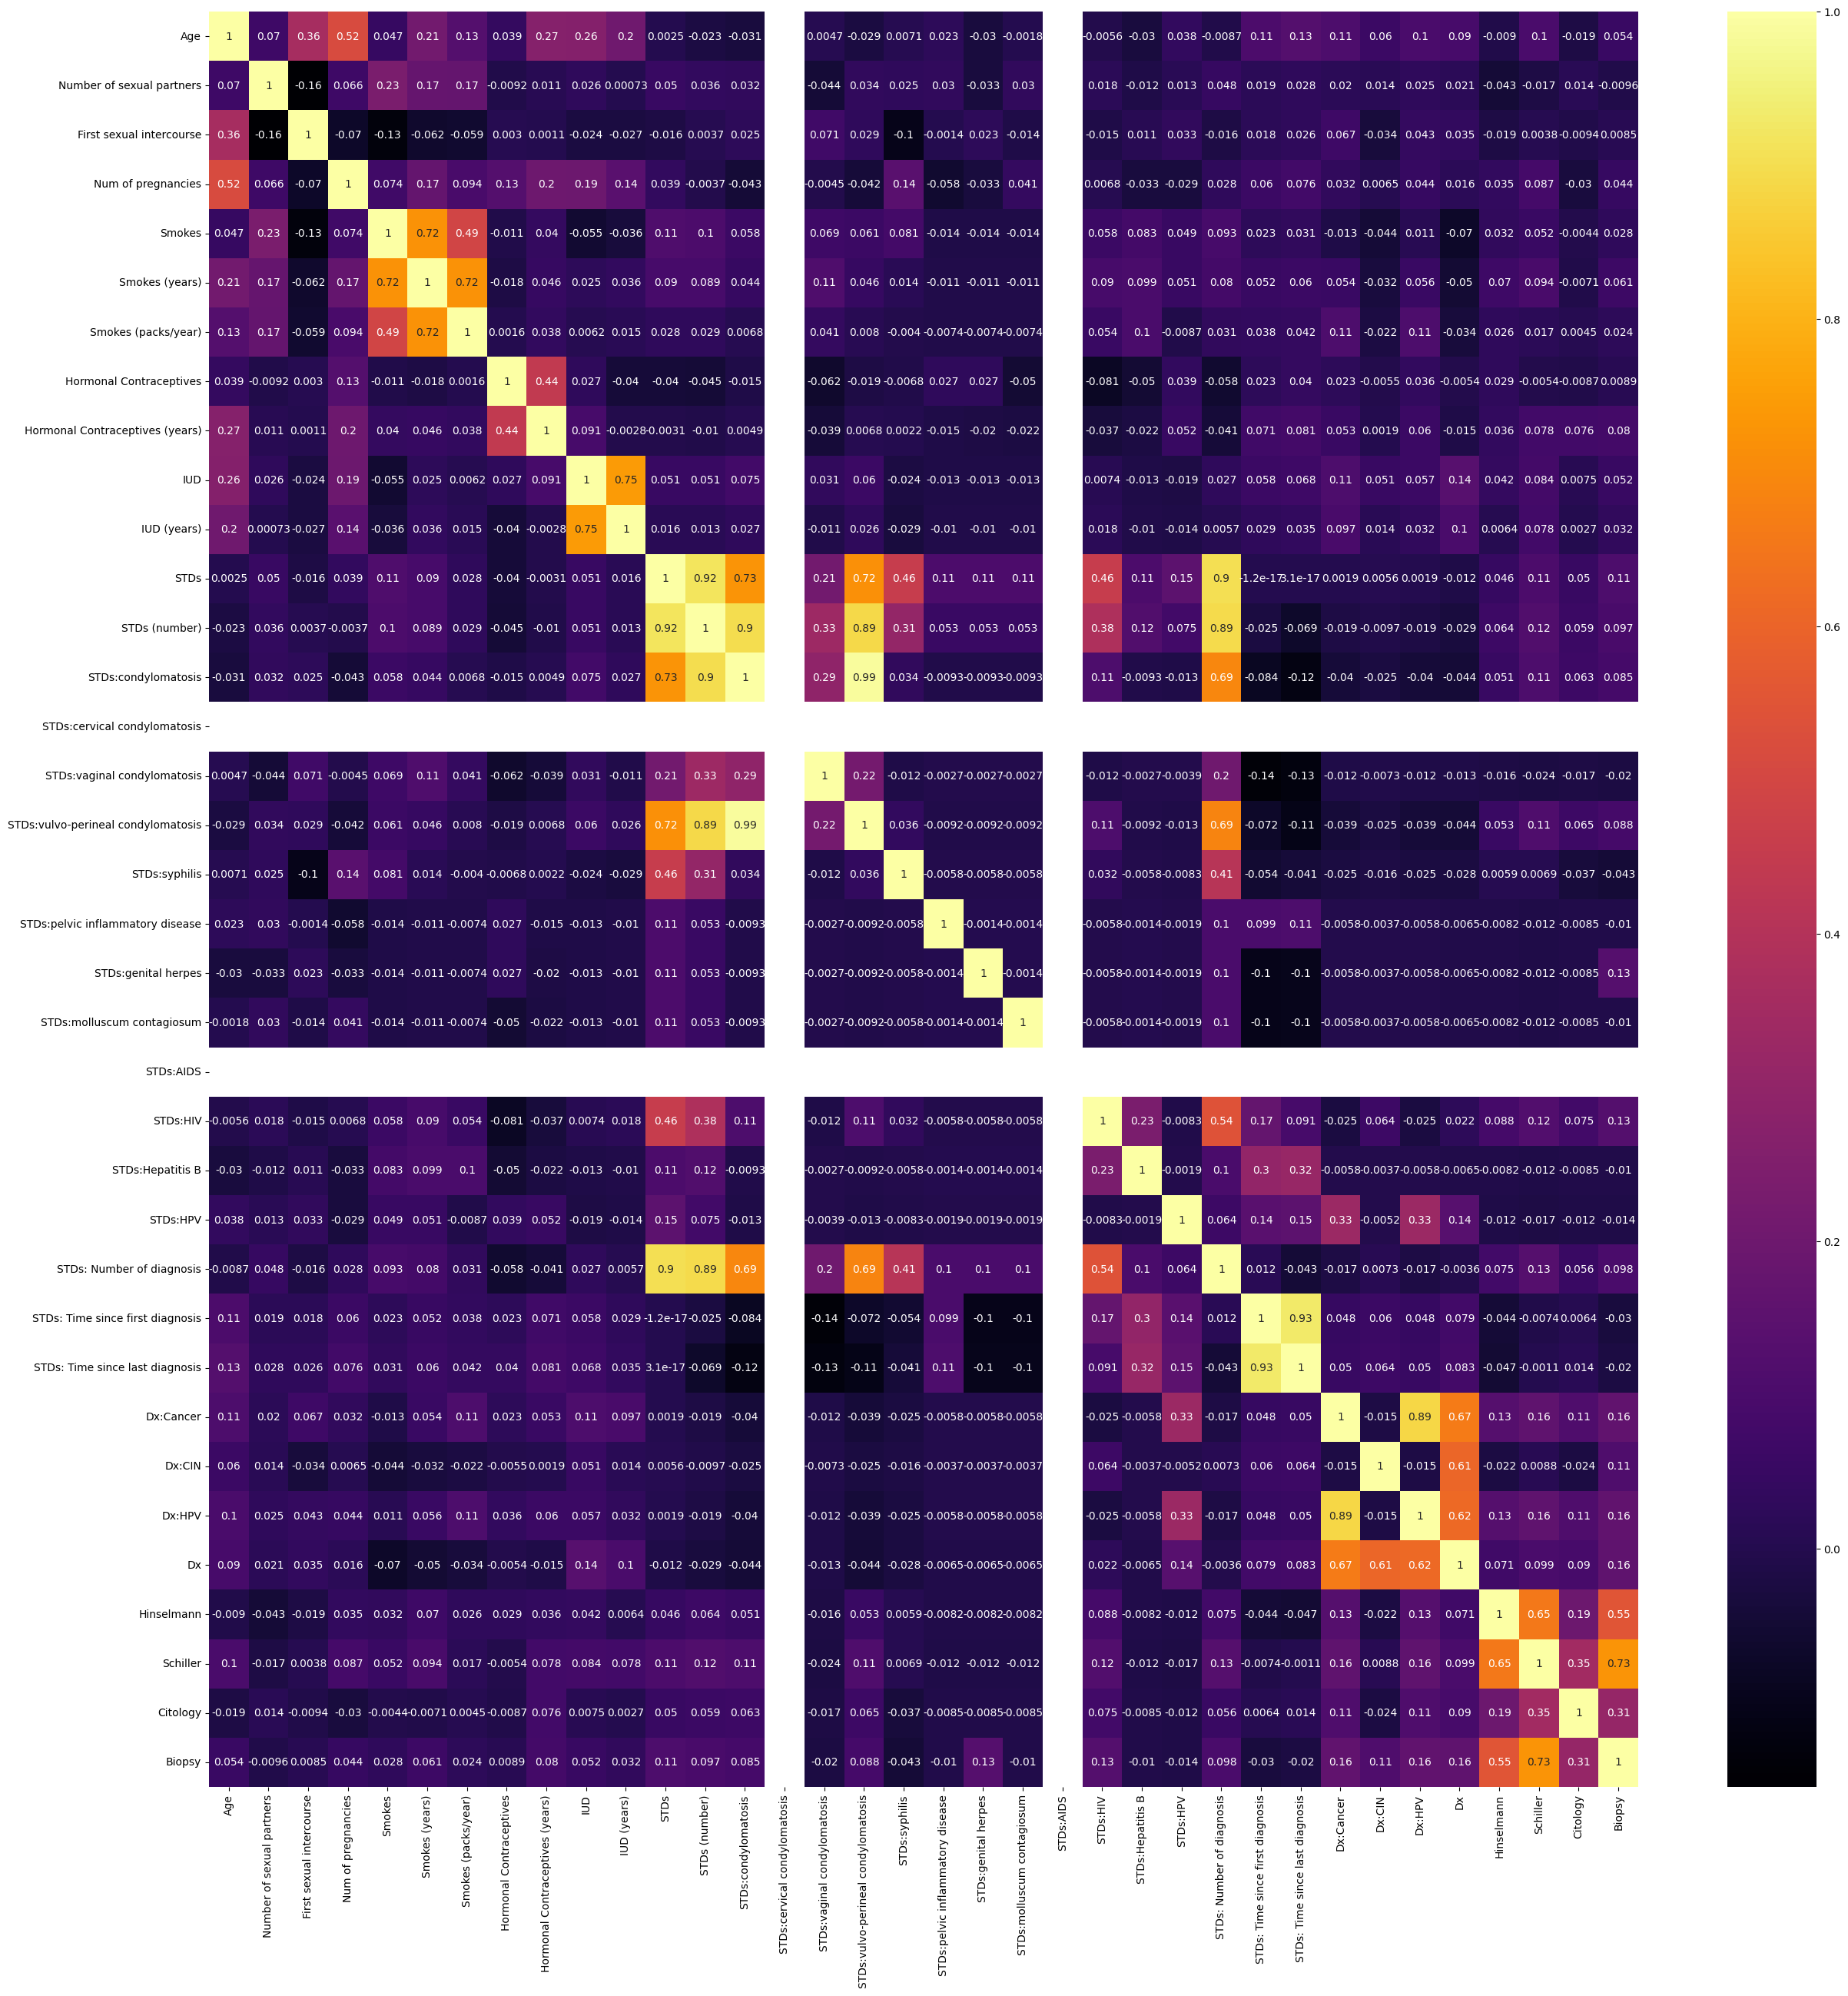

In [36]:
#Visualización interactiva de la matriz de correlación
plt.figure(figsize = (30, 30))
sns.heatmap(mc,
            annot = True,
            cmap = 'inferno')

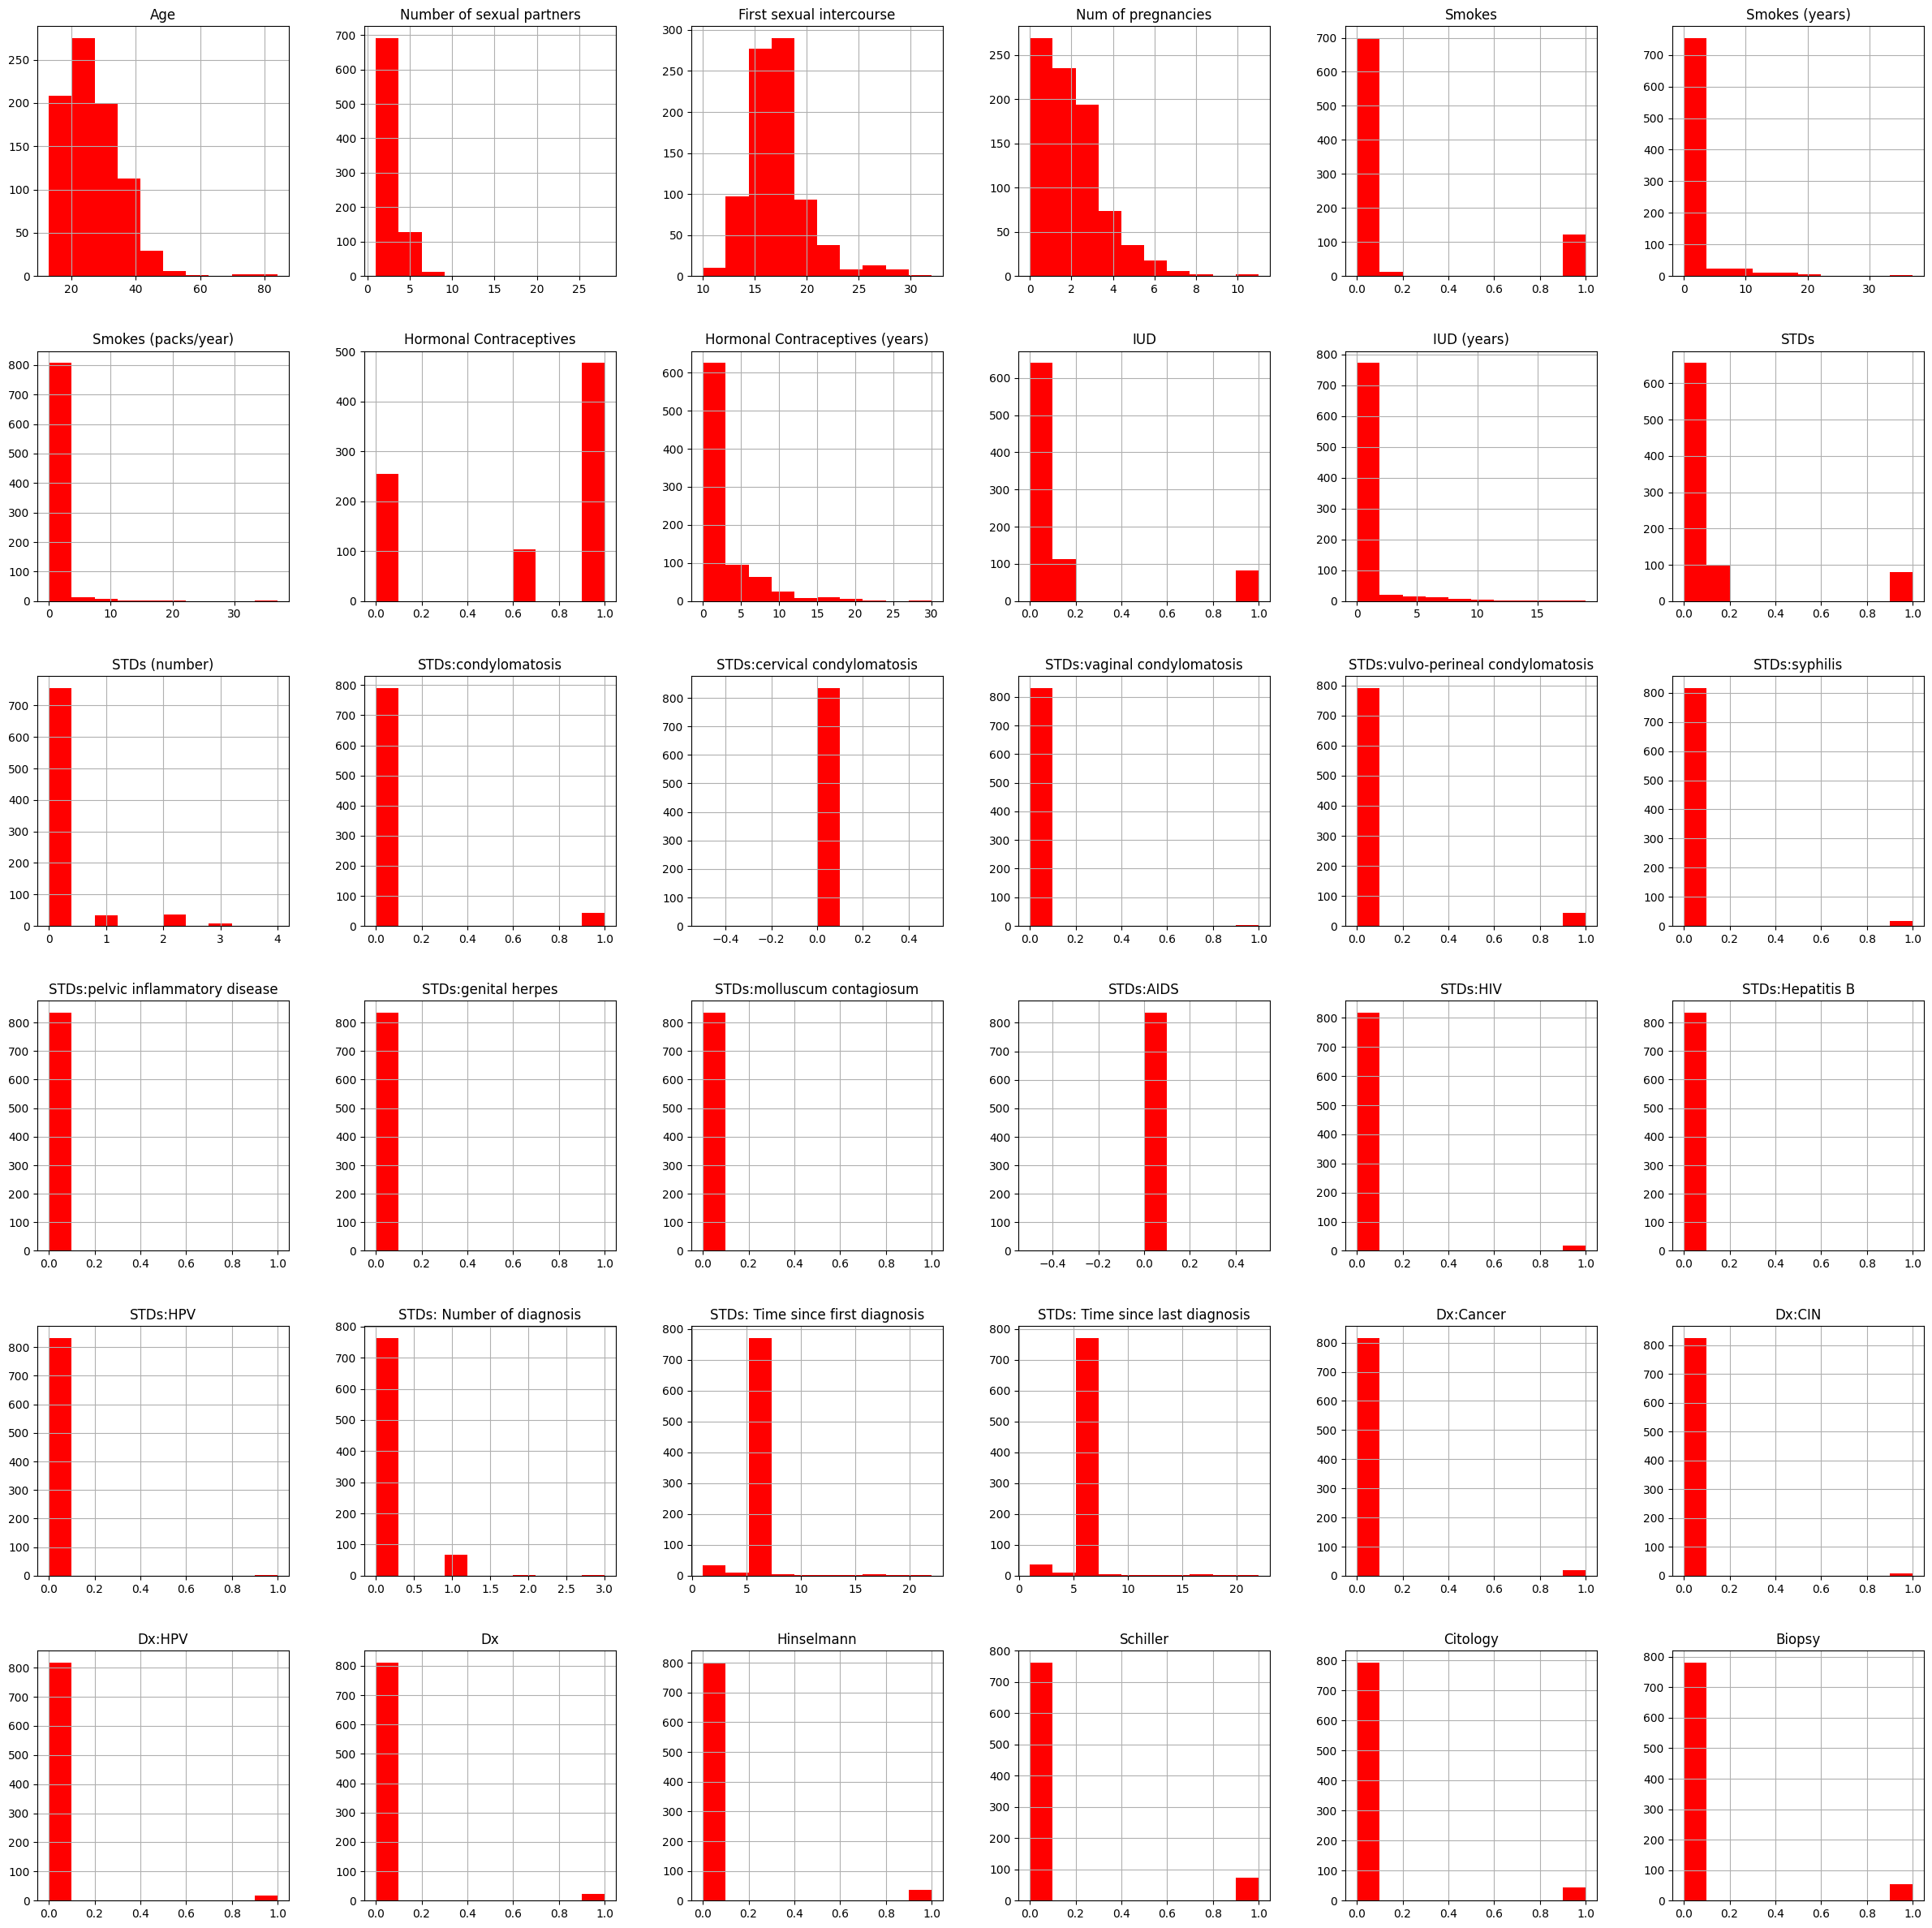

In [37]:
#Visualización de la distribución de los datos.
df.hist(bins = 10, figsize = (30,30), color='red')
plt.show()

# Correlación de las características respecto a la variable etiqueta (Nuestra variable objetivo: El resultado arrojado por la biopsia.)

In [39]:
#Separamos la colummna objetivo "Biopsy" y creamos un dataframe nuevo.
df_x  = df.drop('Biopsy', axis = 1)
df_x.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4.0,15.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6.140845,5.816901,0,0,0,0,0,0,0
1,15,1.0,14.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6.140845,5.816901,0,0,0,0,0,0,0
2,34,1.0,17.020531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6.140845,5.816901,0,0,0,0,0,0,0
3,52,5.0,16.000000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0,6.140845,5.816901,1,0,1,0,0,0,0
4,46,3.0,21.000000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,6.140845,5.816901,0,0,0,0,0,0,0


<Axes: title={'center': 'Correlación con Biopsia'}>

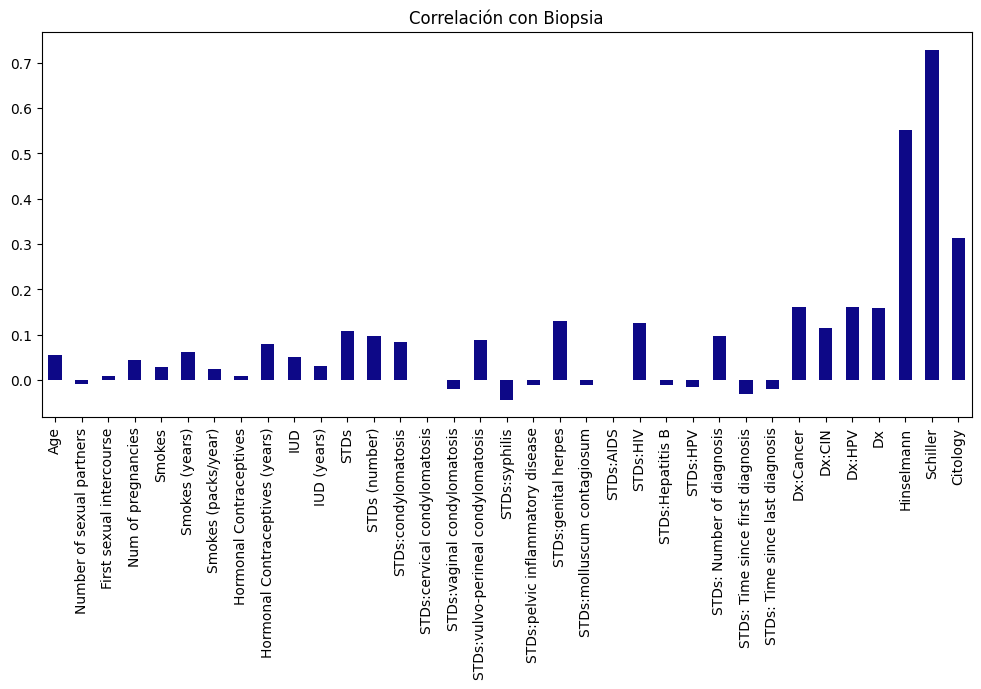

In [40]:
#Observamos la correlación de nuestro dataframe respecto a nuestra Etiqueta objetivo.
df_x.corrwith(df['Biopsy']).plot.bar(
    title = 'Correlación con Biopsia',
    figsize = (12, 5),
    cmap = 'plasma'
)

In [42]:
#Separamos nuestro conjunto de datos Características (X) y etiquetas (y)
df_X = df.drop('Biopsy', axis = 1)
df_y = df['Biopsy']
#Transformamos nuestros dataframe en np.Array para escalarlos.
X = np.array(df_X).astype('float32')
y = np.array(df_y).astype('float32')
X.shape, y.shape


((835, 35), (835,))

#Escalado de los datos.

In [44]:
#Importamos el escalador a utilizar.
from sklearn.preprocessing import StandardScaler
#instanciamos el objeto escaclador.
scaler = StandardScaler()
#Escalamos las característias.
X = scaler.fit_transform(X)

#Separación del conjunto de datos. (Entrenamiento, prueba, validación)

In [46]:
from sklearn.model_selection import train_test_split
#Creación del conjunto de pruebas y entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Creación del conjunto de pruebas y validación a partir del conjunto de pruebas.
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

#Selección y entrenamiento del modelo de aprendizaje automático.

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Selección e inicialización del algoritmo.
svm_classifier = SVC(kernel="linear")

#Entrenamiento del algoritmo con los datos que tenemos.
svm_classifier.fit(X_train, y_train)

#Predicciones del algoritmo con el conjunto de datos de prueba.
y_pred= svm_classifier.predict(X_test)

#Evaluación de la presición del algoritmo. (Yreal vs Ypredicho)
accuracy_test = accuracy_score(y_test, y_pred)

#Predicciones del algoritmo con el conjunto de datos de validación.
y_pred_val= svm_classifier.predict(X_val)

#Evaluación de la presición del algoritmo. (Yreal_validación vs Ypredicho_validación)
accuracy_val = accuracy_score(y_val, y_pred_val)

print(f"Presición conjunto de pruebas: {accuracy_test}")
print(f"Presición conjunto de validación: {accuracy_val}")



Presición conjunto de pruebas: 0.9879518072289156
Presición conjunto de validación: 0.9404761904761905


#Matriz de confusión: Evaluación del modelo.

<Axes: >

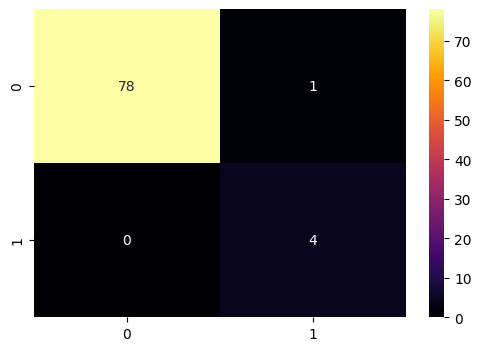

In [48]:
#Matriz de confusión para el conjunto de pruebas.
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix,
            annot = True,

            cmap = 'inferno')

<Axes: >

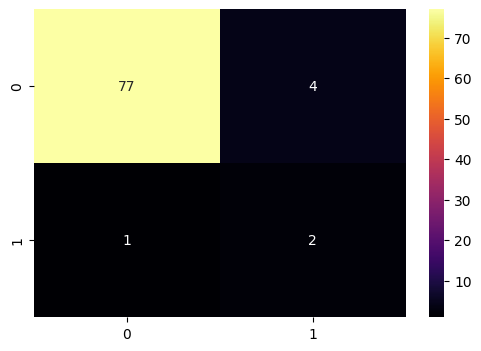

In [51]:
#Matriz de confusión para el conjunto de validación.

from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_val, y_pred_val)

plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix,
            annot = True,
            cmap = 'inferno')